16081
144.8
159.4
168.7
144.4
115.4
65.5
77.3
68.6
61.3
47.0
49.0
59.0
49.6
40.9
33.6
39.0
45.0
41.8
32.2
26.8
32.0
36.0
34.8
29.8
25.8
29.0
32.0
31.8
25.8
21.8
22.0
24.0
24.0
20.0
18.0
17.0
18.0
21.0
19.0
16.0
16.0
16.0
19.0
18.0
13.0
14.0
15.0
16.0
14.0
10.0
12.0
13.0
13.0
11.0
9.0
9.0
9.0
10.0
10.0
8.0
5.0
6.0
8.0
8.0
6.0
3.0
4.0
5.0
6.0
5.0
1.0
2.0
3.0
4.0
4.0
1.0
1.0
3.0
3.0
3.0
1.0
1.0
2.0
2.0
3.0
1.0
1.0
2.0
2.0
3.0
1.0
1.0
2.0
2.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
338.2
336.0
347.0
360.3
373.4
306.3
318.3
326.0
326.2
316.7
224.1
229.3
303.2
322.5
324.7
199.5
208.3
247.5
257.0
275.8
163.6
190.6
174.0
165.2
177.3
146.0
167.0
153.5
141.7
128.4
133.0
152.0
141.8
120.0
110.4
122.0
136.0
128.6
109.5
99.1
114.0
126.0
117.9
98.8
82.8
108.0
117.0
111.9
96.9
78.9
97.0
108.0
107.9
92.9
76.9
87.0
99.0
105.9
89.9
74.9
81.0
95.0
99.9
83.9
73.9
77.0
86.0
94.9
83.9
71.9
72.0
79.0
89.9
81.9
70.9
65.0
73.0
79.0
78.0
68.9
58.0


<ipython-input-3-9495ac9a6cc8>:329: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-3-9495ac9a6cc8>:336: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


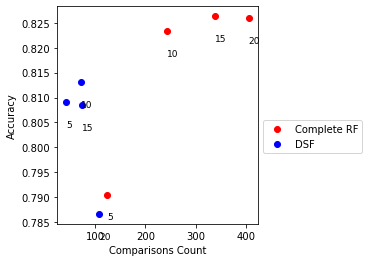

In [3]:

# set dataset name and run, the output results file and plot are exported to the folder InferenceComparison/  
dataset='adult'

import csv,operator,sys,os
import numpy as np
import sklearn
import json
import FeatureGenerators.ReadData as ReadData
import time
from functools import reduce
import matplotlib.pyplot as plt

sys.path.append('arch-forest/data/adult/')
sys.path.append('arch-forest/data/bank/')
sys.path.append('arch-forest/data/wine-quality/')
sys.path.append('arch-forest/data/')
sys.path.append('arch-forest/code/')
import trainForest
import Tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.estimator_checks import check_estimator
from sklearn.metrics import accuracy_score
import FeatureGenerators.DecisionSnippetFeatures




filesPath = "arch-forest/data/"
frequentTreesPath = "forests/rootedFrequentTrees/"
comparisonCountPath = "InferenceComparison/"

from FeatureGenerators.ReadData import readDataAdult,readWine, readWineTest

if (dataset == 'adult'):
    X_train,Y_train = ReadData.readDataAdult('train')
    X_test,Y_test = ReadData.readDataAdult('test')
if (dataset == 'spambase'):
    X_train,Y_train = ReadData.readDataSpambase('train')
    X_test,Y_test = ReadData.readDataSpambase('test')
if (dataset == 'wine-quality'):
        X_train,Y_train = ReadData.readWine()
        X_test,Y_test = ReadData.readWineTest()
if (dataset == 'letter'):
    X_train,Y_train = ReadData.readDataLetter('train')
    X_test,Y_test = ReadData.readDataLetter('test')    
print(len(X_train))

# Classification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.estimator_checks import check_estimator
from sklearn.metrics import accuracy_score
    
import FeatureGenerators.DecisionSnippetFeatures

results_list = []
time_list = []
rf_depth = 5
scoring_function = 'accuracy'
pattern_max_size=6
variant = 'NoLeafEdgesWithSplitValues'

countsList =[]

for rf_depth in (5,10,15,20):
    for frequency in range(2,26,1):
        for pruning in ['','_pruned_with_sigma_0_0','_pruned_with_sigma_0_1','_pruned_with_sigma_0_2','_pruned_with_sigma_0_3']:
    
            rootedFrequentTrees = "RF_"+str(rf_depth)+pruning+"_t"+str(frequency)
            f = open(frequentTreesPath+dataset+'/'+variant+'/leq'+str(pattern_max_size)+'/'+rootedFrequentTrees+'.json')
            frequentpatterns = json.load(f)
            f.close()

            dsf = FeatureGenerators.DecisionSnippetFeatures.FrequentSubtreeFeatures(map(lambda x: x['pattern'], frequentpatterns[-200:])) 

            fts = dsf.fit_transform(X_test,1)

            compareCount = 0
            for i in range(0,len(X_test)):
                for nodesNumber in fts[i]:
                    compareCount += nodesNumber


            print(round(compareCount/len(X_test),1))
            countsList.append('RF_'+str(rf_depth)+pruning+'_t'+str(frequency)+','+str(round(compareCount/len(X_test),1))+',\n')

#Complete

for rf_depth in (5,10,15,20):
    
    f = open(comparisonCountPath+'/'+dataset+'/'+'RF_'+str(rf_depth)+'.json')
    frequentpatterns = json.load(f)
    f.close()

    dsf = FeatureGenerators.DecisionSnippetFeatures.FrequentSubtreeFeatures(map(lambda x: x['pattern'], frequentpatterns[-200:]))  

    fts = dsf.fit_transform(X_test,1)

    compareCount = 0
    for i in range(0,len(X_test)):
        for nodesNumber in fts[i]:
            compareCount += nodesNumber
    
    
    print(round(compareCount/len(X_test)))
    countsList.append('RF_'+str(rf_depth)+','+str(round(compareCount/len(X_test),1))+',\n')    
    


file= open(comparisonCountPath+'/'+dataset+'/'+dataset+'_comparisons_count.csv',"w")
for count in countsList:
    file.write(count)


file.close()
    

    

accuracy_list = []
accuracy_list_rf = []
count_list = []
size_list_rf = []
rf_list = []



with open(comparisonCountPath+'/'+dataset+'/'+dataset+'_comparisons_count'+'.csv') as count_file:
        count_reader = csv.reader(count_file, delimiter='\n')
        line_count = 1
        for row in count_reader:
            if (line_count > 1 ):
                
                rowStr = str(row).split(',')                                       
                count_list.append(rowStr[1])
            line_count +=1    

count_file.close()




for rf_depth in (5,10,15,20):
    
    f = open(comparisonCountPath+'/'+dataset+'/'+'RF_'+str(rf_depth)+'.json')
    frequentpatterns = json.load(f)
    f.close()

    dsf = FeatureGenerators.DecisionSnippetFeatures.FrequentSubtreeFeatures(map(lambda x: x['pattern'], frequentpatterns[-200:]))  

    fts = dsf.fit_transform(X_test,1)

    compareCount = 0
    for i in range(0,len(X_test)):
        for nodesNumber in fts[i]:
            compareCount += nodesNumber
    
    
    print(round(compareCount/len(X_test)))
    countsList.append('RF_'+str(rf_depth)+','+str(round(compareCount/len(X_test),1))+',\n')    
    


file= open(comparisonCountPath+'/'+dataset+'/'+dataset+'_comparisons_count.csv',"w")
for count in countsList:
    file.write(count)


file.close()
 
    
    

accuracy_list = []
accuracy_list_rf = []
count_list = []
size_list_rf = []
rf_list = []



with open(comparisonCountPath+'/'+dataset+'/'+dataset+'_comparisons_count'+'.csv') as count_file:
        count_reader = csv.reader(count_file, delimiter='\n')
        #line_count = 1
        for row in count_reader:
            #if (line_count > 1 ):
                
                rowStr = str(row).split(',')                                       
                count_list.append(rowStr[1])
            #line_count +=1    

count_file.close()



for rf_depth in (5,10,15,20):
    
    with open(frequentTreesPath+'/'+dataset+'/Results_'+variant+'/leq'+str(pattern_max_size)+'/'+'RF_'+str(rf_depth)+'_'+scoring_function+'.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\n')
        line_count = 0
        for row in csv_reader:
            rowStr = str(row).split(',')
            if line_count < 120:
                accuracy_list.append(rowStr[1])
                rf_list.append('RF_'+str(rf_depth)+'_'+rowStr[0][2:])
                if (line_count == 5):
                    accuracy_list_rf.append(rowStr[4])
                line_count+=1
    csv_file.close()
    
print(len(rf_list))
print(len(count_list))
print(len(accuracy_list))
    
f= open(comparisonCountPath+'/'+dataset+'/'+'comparisons_count_vs_accuracy_'+dataset+'_'+variant+'_leq'+str(pattern_max_size)+'.csv',"w")
f.write('RF,comparisons Count,accuracy,\n')
for i in range(0,len(accuracy_list)):
        f.write(rf_list[i]+','+count_list[i]+','+accuracy_list[i]+',\n')
for depth in (5,10,15,20):
        f.write('RF_'+str(depth)+','+count_list[int(depth/5) +len(accuracy_list)-1]+','+accuracy_list_rf[int(depth/5) -1]+',\n')
f.close()


#print(len(accuracy_list))
#for i in range(0,len(count_list)):
#        print(rf_list[i]+'\n')


accuracy_list_dsf = []
count_list_dsf = []
accuracy_list = []
count_list = []


with open(comparisonCountPath+'/'+dataset+'/'+'comparisons_count_vs_accuracy_'+dataset+'_'+variant+'_leq'+str(pattern_max_size)+'.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\n')
        lineCount =1    
            
        for row in csv_reader:
                if (lineCount > 1 ):
                    rowStr = str(row).split(',')
                    if (lineCount > 481):
                        count_list.append(rowStr[1])
                        accuracy_list.append(rowStr[2])
                    else:
                        count_list_dsf.append(rowStr[1])
                        accuracy_list_dsf.append(rowStr[2])
                        
            
                    
                lineCount+=1
                
            
                
csv_file.close()



count = np.array(count_list, dtype=np.float32)
accuracy = np.array(accuracy_list, dtype=np.float32)

count_dsf = np.array(count_list_dsf, dtype=np.float32)
accuracy_dsf = np.array(accuracy_list_dsf, dtype=np.float32)

####
best_dsf_rf5 = 0
best_dsf_rf10 = 0
best_dsf_rf15 = 0
best_dsf_rf20 = 0
best_dsf_rf5_index = 0
best_dsf_rf10_index = 0
best_dsf_rf15_index = 0
best_dsf_rf20_index = 0

for i in range(0,len(count_dsf)):
    if (i < 120):
        if (accuracy_dsf[i] > best_dsf_rf5):
            best_dsf_rf5 = accuracy_dsf[i]
            best_dsf_rf5_index = i
    if (i >= 120 and i < 240):
        if (accuracy_dsf[i] > best_dsf_rf10):
            best_dsf_rf10 = accuracy_dsf[i]
            best_dsf_rf10_index = i    
    if (i >= 240 and i < 360):
        if (accuracy_dsf[i] > best_dsf_rf15):
            best_dsf_rf15 = accuracy_dsf[i]
            best_dsf_rf15_index = i
    if (i >= 360 and i < 480):
        if (accuracy_dsf[i] > best_dsf_rf20):
            best_dsf_rf20 = accuracy_dsf[i]
            best_dsf_rf20_index = i        
    

accuracy_dsf_best = []
accuracy_dsf_best.append(best_dsf_rf5)
accuracy_dsf_best.append(best_dsf_rf10)
accuracy_dsf_best.append(best_dsf_rf15)
accuracy_dsf_best.append(best_dsf_rf20)
count_dsf_best = []
count_dsf_best.append(count_dsf[best_dsf_rf5_index])
count_dsf_best.append(count_dsf[best_dsf_rf10_index])
count_dsf_best.append(count_dsf[best_dsf_rf15_index])
count_dsf_best.append(count_dsf[best_dsf_rf20_index])

for i in range(0,len(count)):
    plt.scatter(count[i], accuracy[i], c='red')
    plt.text(count[i], accuracy[i]-0.005, (i+1)*5, fontsize=9)
    plt.scatter(count_dsf_best[i], accuracy_dsf_best[i], c='blue')
    plt.text(count_dsf_best[i], accuracy_dsf_best[i]-0.005, (i+1)*5, fontsize=9)


#####
#plt.scatter(count, accuracy, c='lightblue')
#plt.scatter(count_dsf, accuracy_dsf, c='red')


plt.xlabel('Comparisons Count')
plt.ylabel('Accuracy')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.60, box.height])
plt.legend(['Complete RF','DSF'],bbox_to_anchor=(1.0, 0.5), loc='upper left')
plt.text(27, 0.77, '')
fig = plt.gcf()
fig.savefig(comparisonCountPath+'comparisons_count_'+dataset+'_'+variant+'_'+scoring_function+'.png', dpi=150)
fig.show()        
